In [81]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cross_validation import KFold, cross_val_score
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor, ExtraTreesRegressor

%matplotlib inline

In [29]:
df = pd.read_csv('./data/user_attributes.csv')

In [30]:
df.head(1).T

,0
subject_id,1.0
wave,1.0
like_sports,9.0
like_tvsports,2.0
like_exercise,8.0
like_food,9.0
like_museums,1.0
like_art,1.0
like_hiking,5.0
like_gaming,1.0


In [31]:
df.dtypes

subject_id                     int64
wave                           int64
like_sports                  float64
like_tvsports                float64
like_exercise                float64
like_food                    float64
like_museums                 float64
like_art                     float64
like_hiking                  float64
like_gaming                  float64
like_clubbing                float64
like_reading                 float64
like_tv                      float64
like_theater                 float64
like_movies                  float64
like_concerts                float64
like_music                   float64
like_shopping                float64
like_yoga                    float64
subjective_attractiveness    float64
subjective_sincerity         float64
subjective_intelligence      float64
subjective_fun               float64
subjective_ambition          float64
objective_attractiveness     float64
objective_sincerity          float64
objective_intelligence       float64
o

In [32]:
df['subject_id'].describe()

count    551.000000
mean     276.787659
std      159.494486
min        1.000000
25%      139.500000
50%      277.000000
75%      414.500000
max      552.000000
Name: subject_id, dtype: float64

In [33]:
len(df)

551

In [34]:
df.isnull().sum()

subject_id                     0
wave                           0
like_sports                    7
like_tvsports                  7
like_exercise                  7
like_food                      7
like_museums                   7
like_art                       7
like_hiking                    7
like_gaming                    7
like_clubbing                  7
like_reading                   7
like_tv                        7
like_theater                   7
like_movies                    7
like_concerts                  7
like_music                     7
like_shopping                  7
like_yoga                      7
subjective_attractiveness      9
subjective_sincerity           9
subjective_intelligence        9
subjective_fun                 9
subjective_ambition            9
objective_attractiveness     237
objective_sincerity          237
objective_intelligence       237
objective_fun                237
objective_ambition           237
dtype: int64

In [35]:
df = df.drop(['objective_attractiveness', 'objective_sincerity', 'objective_intelligence', \
              'objective_fun', 'objective_ambition'], axis = 1)

In [36]:
df[df['subjective_attractiveness'].isnull()]

,subject_id,wave,like_sports,like_tvsports,like_exercise,like_food,like_museums,like_art,like_hiking,like_gaming,...,like_movies,like_concerts,like_music,like_shopping,like_yoga,subjective_attractiveness,subjective_sincerity,subjective_intelligence,subjective_fun,subjective_ambition
27,28,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
57,58,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
58,59,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
134,136,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
337,339,13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
338,340,13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
344,346,14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
412,414,15,10.0,5.0,9.0,5.0,0.0,0.0,5.0,5.0,...,0.0,0.0,1.0,2.0,0.0,NaN,NaN,NaN,NaN,NaN
414,416,16,4.0,1.0,8.0,8.0,7.0,6.0,6.0,1.0,...,7.0,5.0,10.0,4.0,3.0,NaN,NaN,NaN,NaN,NaN


In [37]:
df = df.drop(df.index[[27, 57, 58, 134, 337, 338, 344, 412, 414]])

In [38]:
df.isnull().sum()

subject_id                   0
wave                         0
like_sports                  0
like_tvsports                0
like_exercise                0
like_food                    0
like_museums                 0
like_art                     0
like_hiking                  0
like_gaming                  0
like_clubbing                0
like_reading                 0
like_tv                      0
like_theater                 0
like_movies                  0
like_concerts                0
like_music                   0
like_shopping                0
like_yoga                    0
subjective_attractiveness    0
subjective_sincerity         0
subjective_intelligence      0
subjective_fun               0
subjective_ambition          0
dtype: int64

In [39]:
len(df)

542

In [40]:
del df['subject_id']

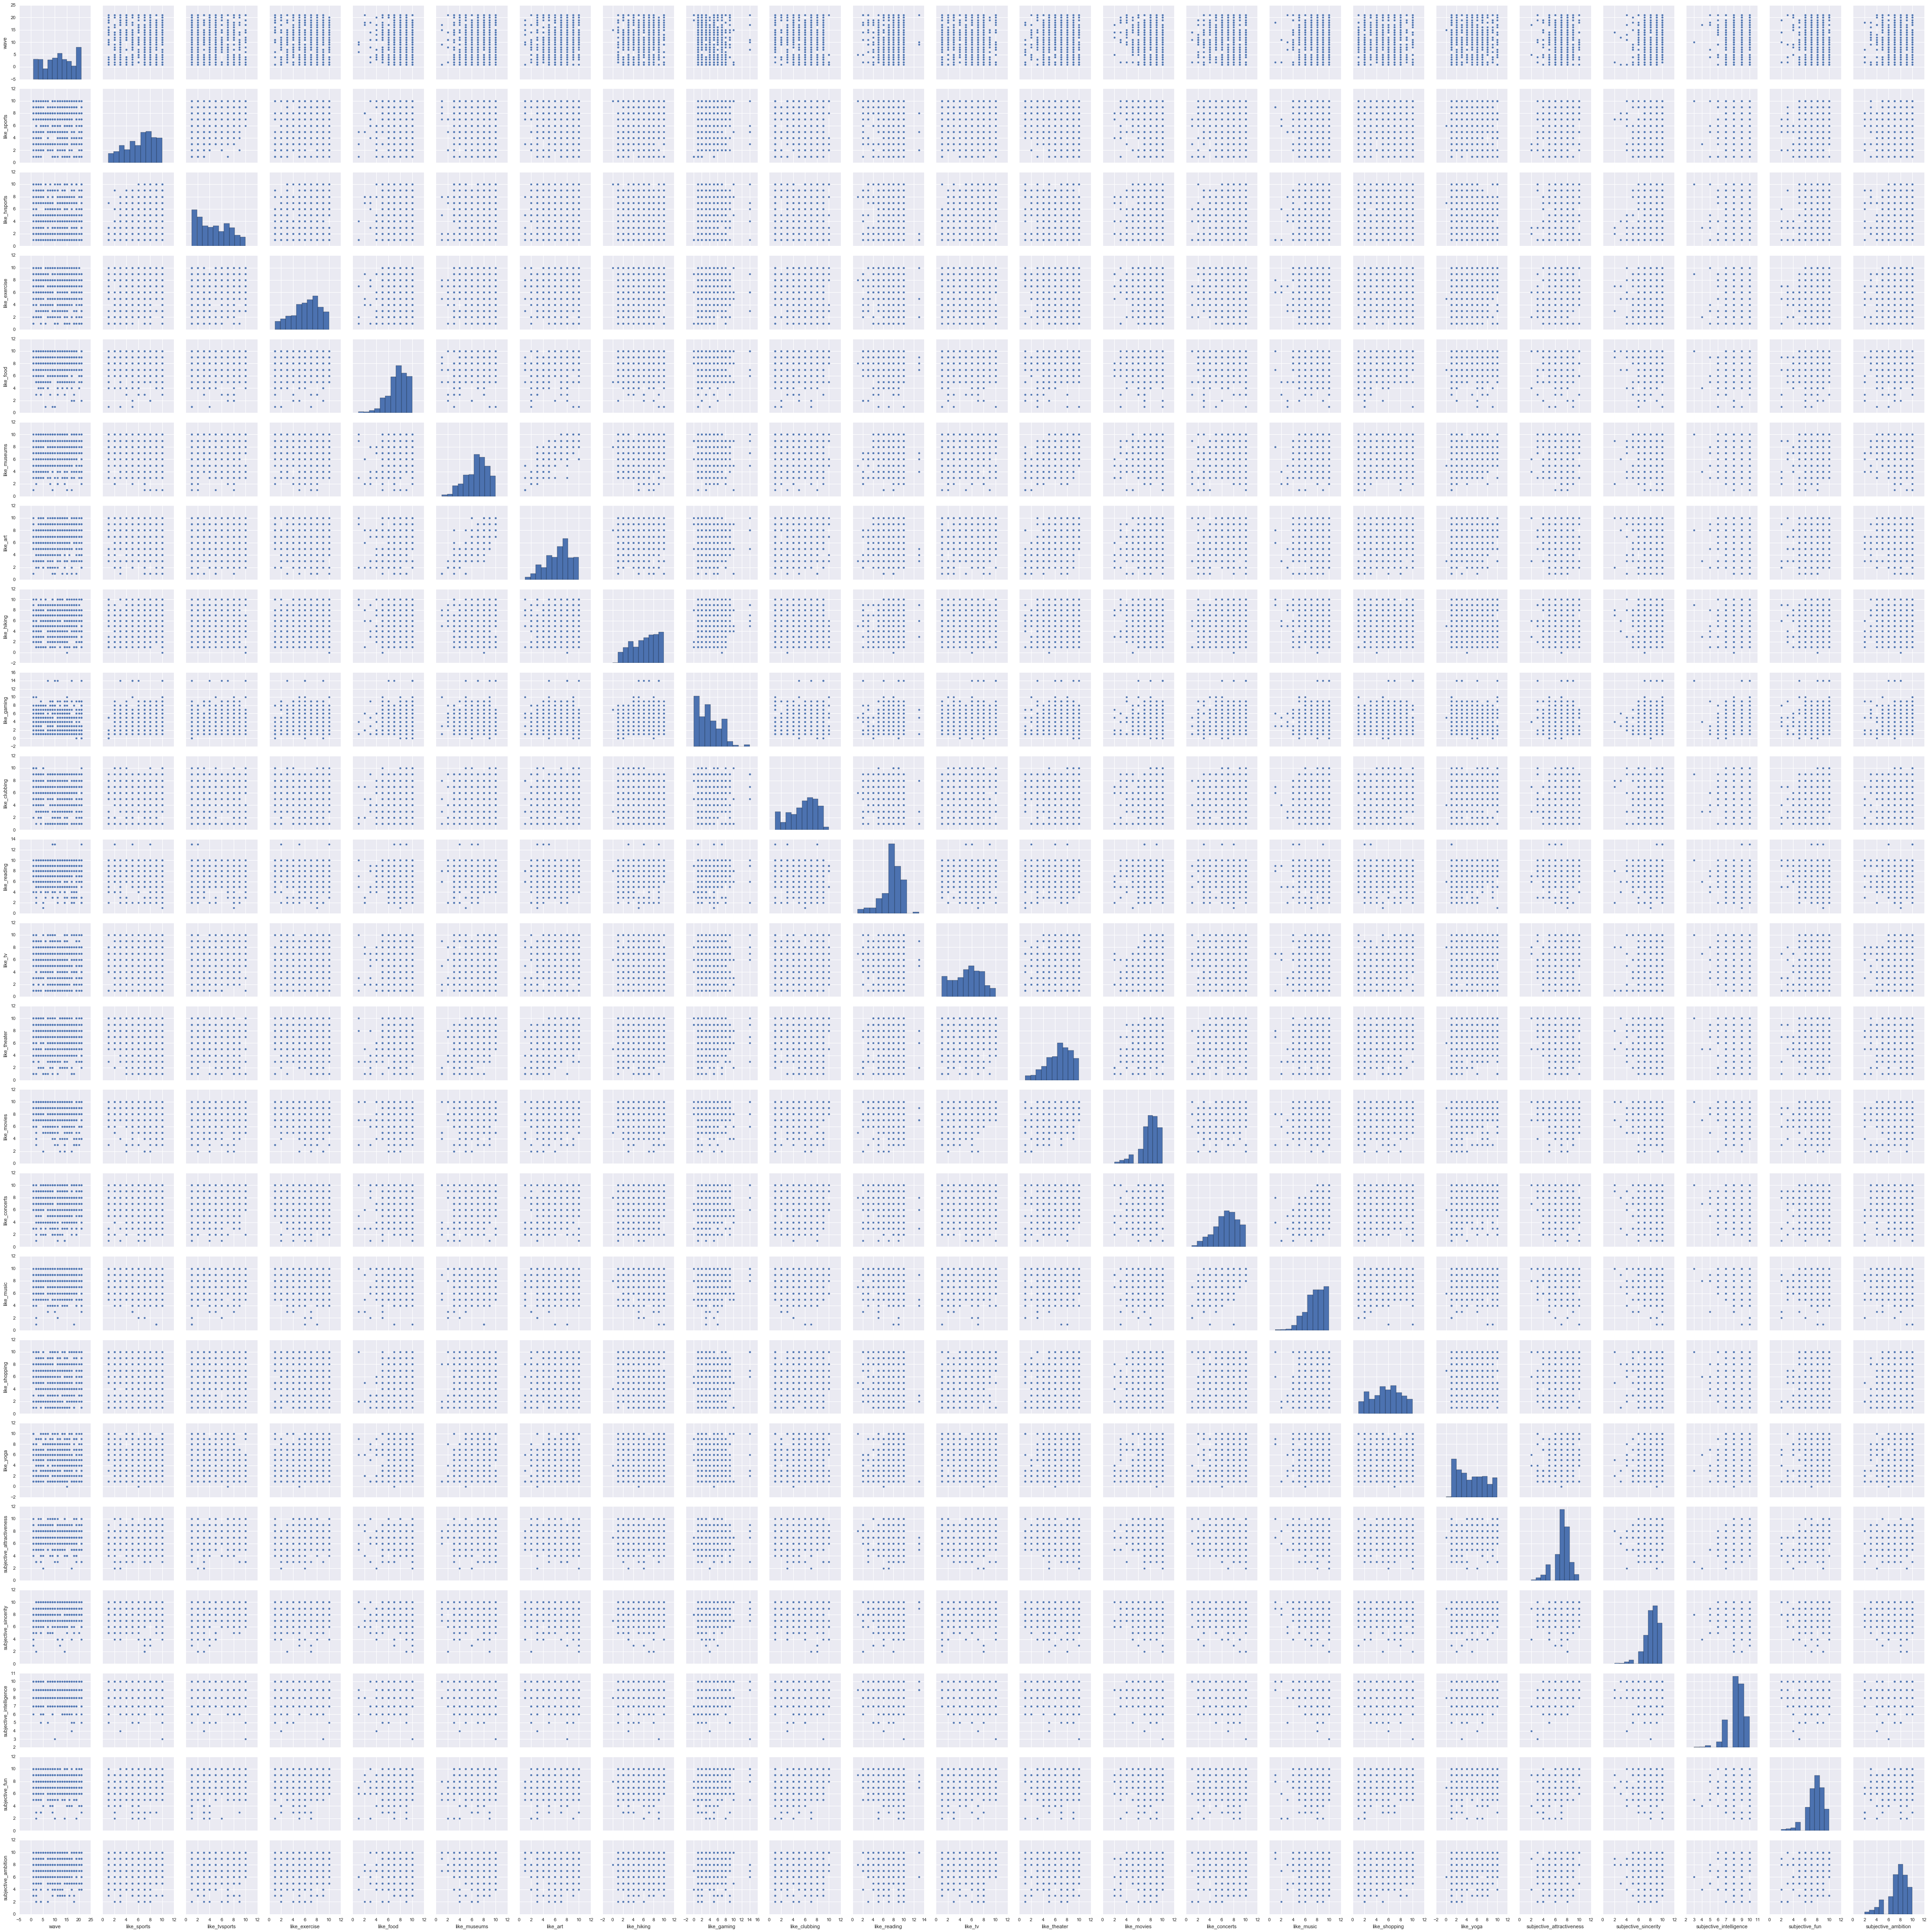

In [22]:
sns.pairplot(df)

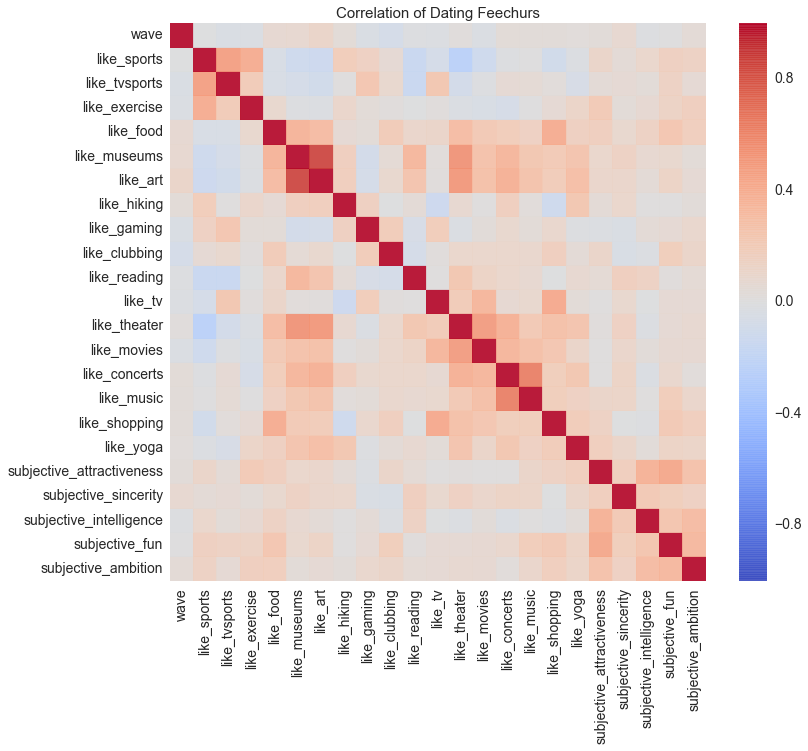

In [41]:
plt.figure(figsize=(12,10))
sns.set(font_scale=1.4)
ax = sns.heatmap(df.corr()\
#                 .applymap(lambda x: abs(x))\
                 ,cmap = "coolwarm", alpha = 0.9)

ax.axes.set_title("Correlation of Dating Feechurs", size = 15)

plt.show()

In [42]:
del df['like_museums']

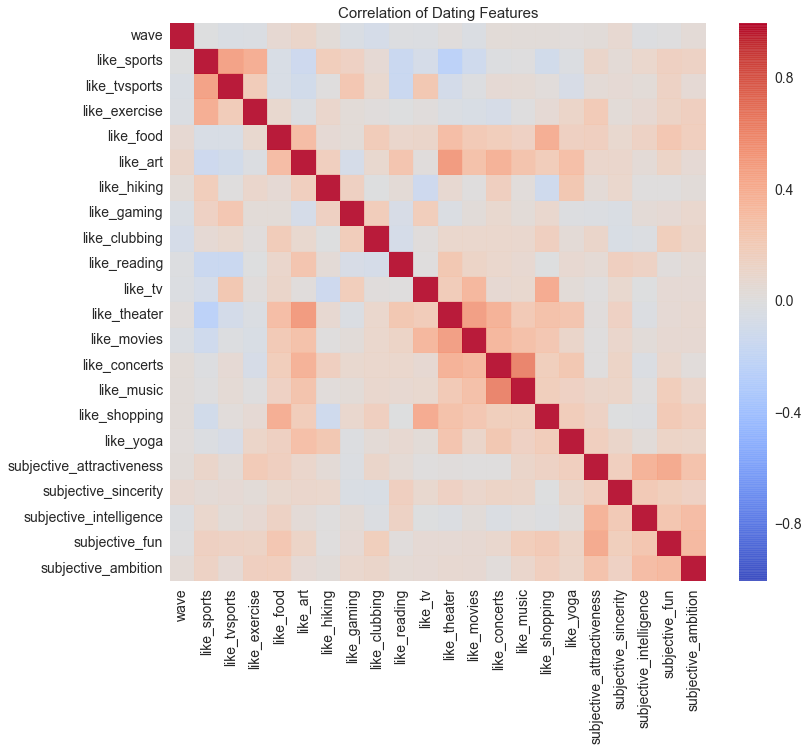

In [44]:
plt.figure(figsize=(12,10))
sns.set(font_scale=1.4)
ax = sns.heatmap(df.corr()\
#                 .applymap(lambda x: abs(x))\
                 ,cmap = "coolwarm", alpha = 0.9)

ax.axes.set_title("Correlation of Dating Features", size = 15)

plt.show()

In [45]:
X = df.ix[:, 0:len(df.columns)]
y = df['subjective_attractiveness']
del X['subjective_attractiveness']

In [49]:
Xs = StandardScaler().fit_transform(X.astype(float))
Xs = pd.DataFrame(Xs, columns = X.columns[0:len(X.columns)])
len(Xs.columns)

21

In [66]:
cv = KFold(len(X), n_folds = 542, shuffle=False)


def do_plot(model, m=1):
    for fold, color in zip(cv, plot_colors):
        X_train = X.iloc[fold[0]]
        X_test  = X.iloc[fold[1]]
        y_train = y.iloc[fold[0]]
        y_test  = y.iloc[fold[1]]
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
                
        plt.scatter(y_pred, y_test, color='black', s = 10)
#        plt.plot([0,1],[0,1], linewidth = 0.2)
        plt.text(0.9,0.9, "R^2: "+str(m), fontsize=20)
    return  

In [56]:
rf = RandomForestRegressor(n_jobs = -1, n_estimators = 100)

scores = cross_val_score(rf, Xs, y, cv=cv)
scores.mean()

0.0036900369003690036

/Users/Rebecca/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


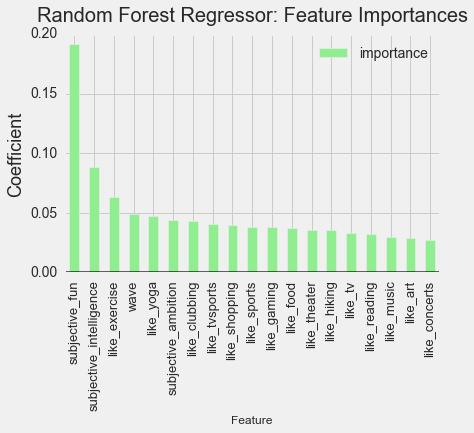

In [68]:
rf.fit(Xs, y)
features = sorted(zip(map(lambda x: round(x, 4), rf.feature_importances_), Xs.columns), 
             reverse=True)
features_rf = pd.DataFrame(features, columns = ['importance', 'feature'])
features_rf = features_rf.sort('importance', ascending = False)
features_rf = features_rf.set_index('feature', drop = True)

plt.figure(figsize=(12,8))
plt.style.use('fivethirtyeight')

features_rf[0:19].plot.bar(color = 'lightgreen')

plt.title('Random Forest Regressor: Feature Importances', fontsize = 20, y = 1.03)

# y label
plt.ylabel('Coefficient', fontsize = 18)

# x label
plt.xlabel('Feature', fontsize = 12)
plt.axhline(0, color='black', alpha = 0.6)
plt.xticks(rotation = 90, fontsize = 13)
plt.show()

In [74]:
ab = AdaBoostRegressor(n_estimators = 100)

scores = cross_val_score(ab, Xs, y, cv=cv)
scores.mean()

0.0

/Users/Rebecca/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


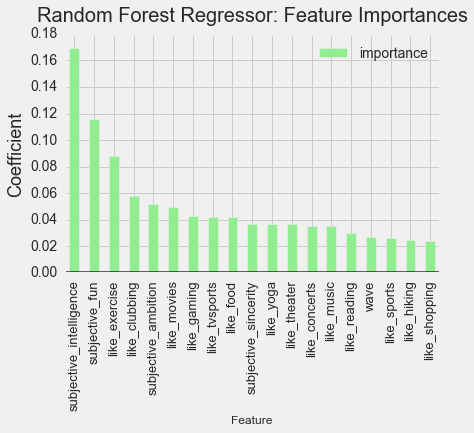

In [76]:
ab.fit(Xs, y)
features = sorted(zip(map(lambda x: round(x, 4), ab.feature_importances_), Xs.columns), 
             reverse=True)
features_ab = pd.DataFrame(features, columns = ['importance', 'feature'])
features_ab = features_ab.sort('importance', ascending = False)
features_ab = features_ab.set_index('feature', drop = True)

plt.figure(figsize=(12,8))
plt.style.use('fivethirtyeight')

features_ab[0:19].plot.bar(color = 'lightgreen')

plt.title('Random Forest Regressor: Feature Importances', fontsize = 20, y = 1.03)

# y label
plt.ylabel('Coefficient', fontsize = 18)

# x label
plt.xlabel('Feature', fontsize = 12)
plt.axhline(0, color='black', alpha = 0.6)
plt.xticks(rotation = 90, fontsize = 13)
plt.show()

In [83]:
gb = GradientBoostingRegressor(n_estimators = 100)

scores = cross_val_score(gb, Xs, y, cv=cv)
scores.mean()

0.0

/Users/Rebecca/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


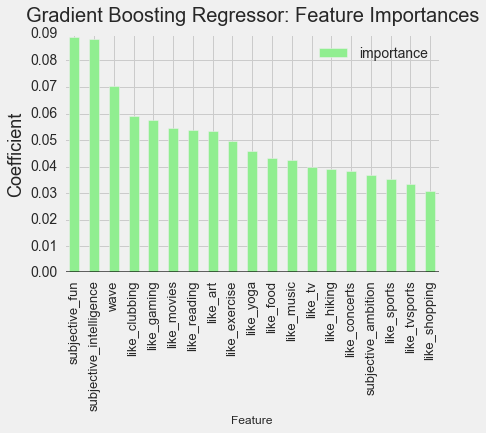

In [85]:
gb.fit(Xs, y)
features = sorted(zip(map(lambda x: round(x, 4), gb.feature_importances_), Xs.columns), 
             reverse=True)
features_gb = pd.DataFrame(features, columns = ['importance', 'feature'])
features_gb = features_gb.sort('importance', ascending = False)
features_gb = features_gb.set_index('feature', drop = True)

plt.figure(figsize=(12,8))
plt.style.use('fivethirtyeight')

features_gb[0:19].plot.bar(color = 'lightgreen')

plt.title('Gradient Boosting Regressor: Feature Importances', fontsize = 20, y = 1.03)

# y label
plt.ylabel('Coefficient', fontsize = 18)

# x label
plt.xlabel('Feature', fontsize = 12)
plt.axhline(0, color='black', alpha = 0.6)
plt.xticks(rotation = 90, fontsize = 13)
plt.show()

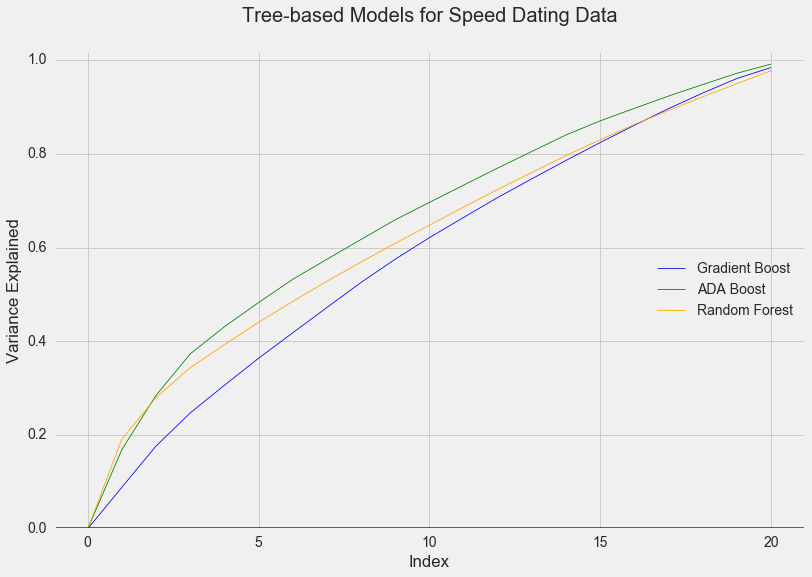

In [86]:
def TheAccumulator(df):
    cumulative = []
    total = 0
    for i in range(len(df)):
        cumulative.append(total)
        total += df['importance'][i]
    df['sum'] = cumulative
    df = df.reset_index(drop = True)
    return df

features_rf = TheAccumulator(features_rf)
features_ab = TheAccumulator(features_ab)
features_gb = TheAccumulator(features_gb)

plt.figure(figsize=(12,8))
plt.style.use('fivethirtyeight')

plt.plot(features_gb.index, features_gb['sum'], color = 'Blue', linewidth = 0.8, label = 'Gradient Boost')
plt.plot(features_ab.index, features_ab['sum'], color = 'Green', linewidth = 0.8, label = 'ADA Boost')
plt.plot(features_rf.index, features_rf['sum'], color = 'Orange', linewidth = 0.8, label = 'Random Forest')
plt.axhline(0, color='black', alpha = 0.6)
plt.title('Tree-based Models for Speed Dating Data', fontsize = 20, y = 1.05)

# y label
plt.ylabel('Variance Explained')

# x label
plt.xlabel('Index', y = 0.1)

plt.xlim([-1, 21])
plt.ylim([0, 1.02])
plt.legend(loc='center right')

plt.show()